# préparation des données

In [1]:
import pandas as pd # bibliothèque pandas pour le prétraitement des données
df = pd.read_csv('healthcare-dataset-stroke-data.csv') # lire les données à l'aide de pandas
df.head()# montrant les 5 premières lignes .

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Les valeurs manquantes

In [2]:
# Calculez le nombre de valeurs manquantes pour chaque colonne
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [3]:
# le bmi est la colonne où se trouvent les valeurs manquantes. Ainsi, nous choisirons de remplacer ces valeurs NaN par la moyenne.
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

### Categorical features

In [4]:
"""
"other" ne représente pas grand-chose. Ainsi, 
et afin d'éviter les valeurs aberrantes, nous décidons de remplacer par le mode de la colonne genre.
"""
df['gender'] = df['gender'].replace('Other', list(df.gender.mode().values)[0])
df.gender.value_counts()# print the number of patients for each sex.

Female    2995
Male      2115
Name: gender, dtype: int64

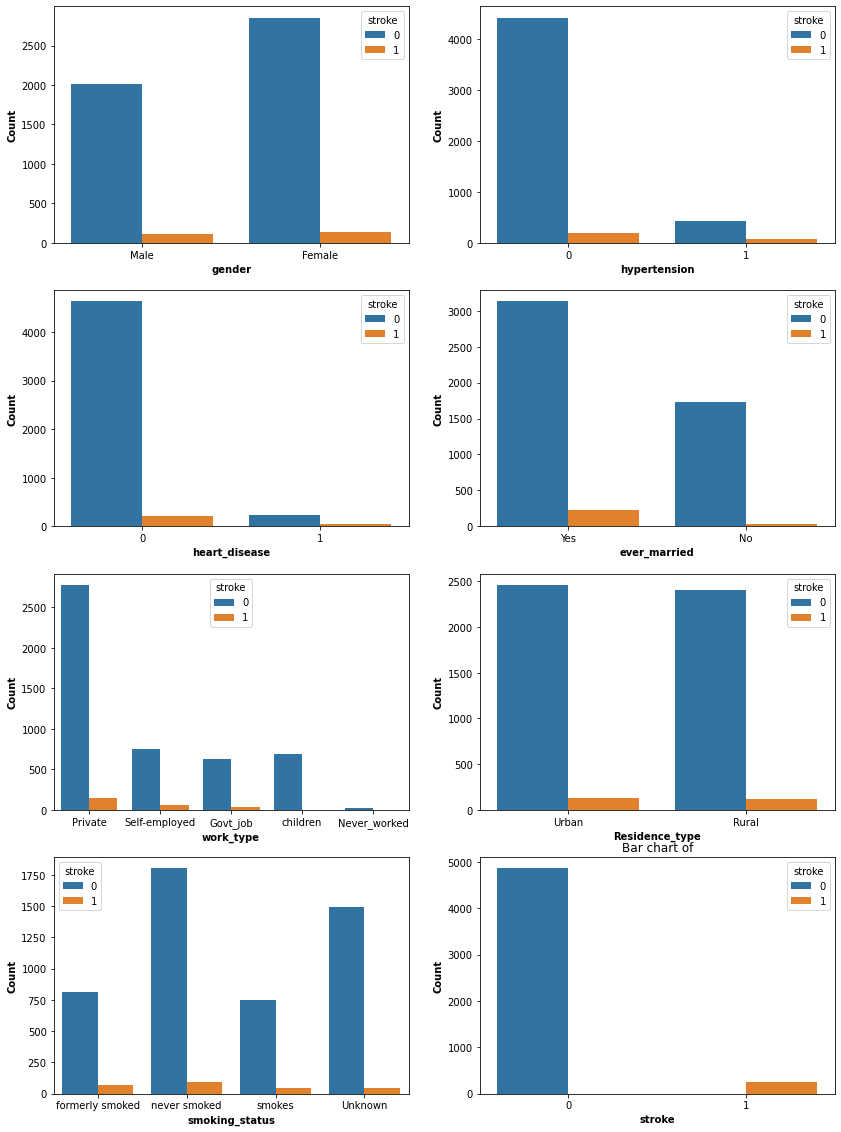

In [5]:
import matplotlib.pyplot as plt #Les bibliothèques Matplotlib et seaborn sont destinées aux visualisations.
import seaborn as sns
"""
Nous ferons les visualisations pour les fonctionnalités catégorielles.
"""
# La list des columns catégorielles
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']
fig, axs = plt.subplots(4, 2, figsize=(14,20))# L'intialization de la figure
axs = axs.flatten()
"""
parcourir chaque colonne de df_catd et le tracer
"""
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=df, ax=axs[i], hue =df['stroke']) # L'affichage de la visualization.
    plt.title("Bar chart of") # Titre
    axs[i].set_xlabel(f"{col_name}", weight = 'bold') # Libillé de l'axe x
    axs[i].set_ylabel('Count', weight='bold')# Libillé de l'axe Y

### Contunious features

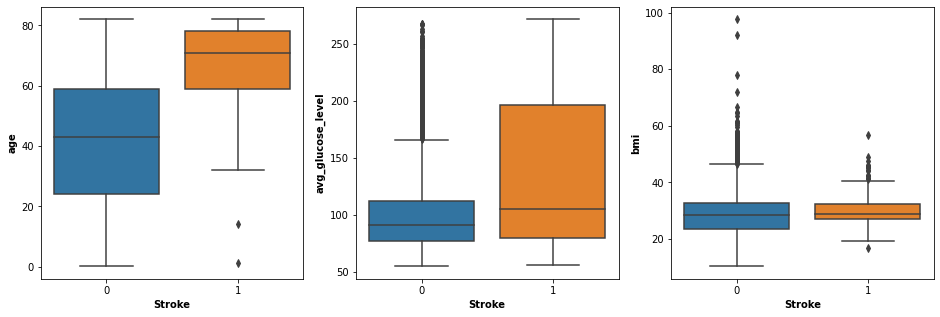

In [6]:
"""
Visualisations pour les fonctionnalités continues
"""
df_num = ['age', 'avg_glucose_level', 'bmi'] # la list des fonctionnalités continues
fig, axs = plt.subplots(1, 3, figsize=(16,5)) # La figure
axs = axs.flatten()
"""
parcourir chaque colonne dans df_num et tracer
"""
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=df, ax=axs[i]) # La='affichage de la figure
    axs[i].set_xlabel("Stroke", weight = 'bold')# libellé de X
    axs[i].set_ylabel(f"{col_name}", weight='bold')# libellé de Y

### Features encoding

In [7]:
from sklearn.preprocessing import LabelEncoder # L'importation de l'objet LabelEncoder
"""
Encodage des caractéristiques catégorielles
"""
le = LabelEncoder() # La déclaration de l'objet
data = df # Gardez une copie des données avant l'encodage
data['gender'] = le.fit_transform(data['gender'])# L'encodage de gender
data['ever_married'] = le.fit_transform(data['ever_married'])# L'encodage de "ever_married"
data['work_type'] = le.fit_transform(data['work_type'])# L'encodage de "work_type"
data['Residence_type'] = le.fit_transform(data['Residence_type'])#L'encodage de "Residence_type"
data['smoking_status'] = le.fit_transform(data['smoking_status'])#L'encodage de "smoking_status"
df_en = data# df_en sont les nouvaux données aprés l'encodage.
df_en.head()#affichage de l'entêt

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


### Correlation between features

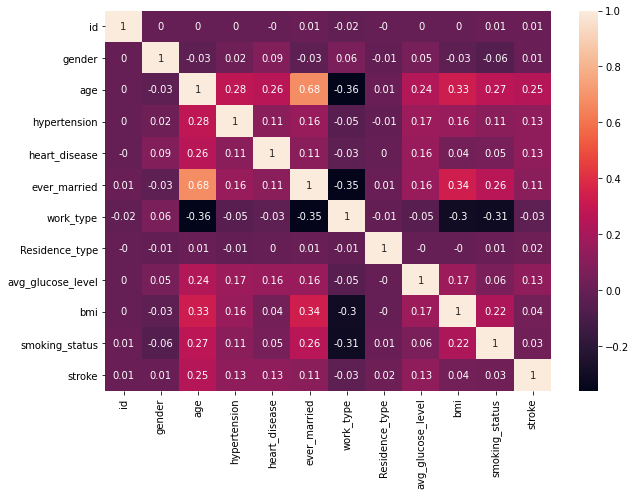

In [8]:
# nous utiliserons la carte thermique pour tracer la matrice de corrélation
corr = df_en.corr().round(2) # Le calcule de la matrice
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True); # L'affichage de la matrice avec heatmap

In [9]:
df_en.drop('ever_married',axis=1,inplace=True) # élimination de ever_maried.

### Data scaling

In [10]:
"""
Changement de L'échelle des données
"""
from sklearn.preprocessing import StandardScaler #importation de l'objet
s = StandardScaler()# Initialization de l'objet.
columns = ['avg_glucose_level','bmi','age']#La définition des columns à coder.
stand_scaled = s.fit_transform(df_en[['avg_glucose_level','bmi','age']])#l'encodage
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)#La transformation des données codées à un 'dataframe"
df_en=df_en.drop(columns=columns,axis=1)
stand_scaled.head()#L'affichage de l'entêt des donnes codées.

,avg_glucose_level,bmi,age
0,2.706375,1.001234e+00,1.051434
1,2.121559,1.384666e-15,0.786070
2,-0.005028,4.685773e-01,1.626390
3,1.437358,7.154182e-01,0.255342
4,1.501184,-6.357112e-01,1.582163


In [11]:
df = pd.concat([df_en, stand_scaled], axis=1) # La concatenation des donnes codés avec les autres données
df.head(3)#l'affichade de l'entête

,id,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,9046,1,0,1,2,1,1,1,2.706375,1.001234e+00,1.051434
1,51676,0,0,0,3,0,2,1,2.121559,1.384666e-15,0.786070
2,31112,1,0,1,2,0,2,1,-0.005028,4.685773e-01,1.626390


### Data split

In [12]:
# diviser les données en entries et en sorties.
X = df.drop(['id','stroke'],axis=1) #les entrées
y = df['stroke']# les sorties

In [13]:
# La division des données (Training / Test)
from sklearn.model_selection import train_test_split# importation de l'objet train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, accuracy_score, classification_report#l'importation des metriques d'evaluation
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 124)# La dévision des données.

### Machine learning models

In [14]:
# Ici, nous importons 3 modèles d'apprentissage automatique
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
# Random Forest
model = RandomForestClassifier() # Initialization de modéle.
model.fit(x_train,y_train) # l'entrainment du modéle.
pred = model.predict(x_test) # La prédiction dans les données de Test
print('\n Les performances de \'Fôret aléatoire\''+10*'-')
print(confusion_matrix(y_test,pred))#L'affichage de la matrice de confusion.
print('Acurracy is',accuracy_score(y_test,pred))# affichage de l'accuracy
print(classification_report(y_test,pred))#l'affichage du rappot de classification

[[1461    3]
 [  68    1]]
Acurracy is 0.9536855838225701
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1464
           1       0.25      0.01      0.03        69

    accuracy                           0.95      1533
   macro avg       0.60      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533



In [16]:
# KNN
model = KNeighborsClassifier()# Initialization de modéle.
model.fit(x_train,y_train)# l'entrainment du modéle.
pred = model.predict(x_test)# La prédiction dans les données de Test
print('\n Les performances de \'k plus proches voisins\''+10*'-')
print(confusion_matrix(y_test,pred))#L'affichage de la matrice de confusion.
print('Acurracy is',accuracy_score(y_test,pred))# affichage de l'accuracy
print(classification_report(y_test,pred))#l'affichage du rappot de classification

[[1457    7]
 [  66    3]]
Acurracy is 0.9523809523809523
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1464
           1       0.30      0.04      0.08        69

    accuracy                           0.95      1533
   macro avg       0.63      0.52      0.53      1533
weighted avg       0.93      0.95      0.94      1533



In [18]:
# GaussianNB
model = GaussianNB()# Initialization de modéle.
model.fit(x_train,y_train)# l'entrainment du modéle.
pred = model.predict(x_test)# La prédiction dans les données de Test
print('\n Les performances de \'Naive bayes\''+10*'-')
print(confusion_matrix(y_test,pred))#L'affichage de la matrice de confusion.
print('Acurracy is',accuracy_score(y_test,pred))# affichage de l'accuracy
print(classification_report(y_test,pred))#l'affichage du rappot de classification

[[1311  153]
 [  42   27]]
Acurracy is 0.87279843444227
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1464
           1       0.15      0.39      0.22        69

    accuracy                           0.87      1533
   macro avg       0.56      0.64      0.57      1533
weighted avg       0.93      0.87      0.90      1533



In [ ]:
!python fr.py